In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('Daily_AI_Assistant_Usage_Behavior_Dataset.csv')
df.head()

,timestamp,device,usage_category,prompt_length,session_length_minutes,satisfaction_rating,assistant_model
0,20-02-2025 03:29,Desktop,Education,14.0,7.08,5.0,GPT-5.1
1,08-01-2025 18:28,Mobile,Daily Tasks,32.0,13.07,2.0,GPT-4o
2,12-01-2025 17:56,Smart Speaker,Education,236.0,10.15,4.0,GPT-4o
3,04-01-2025 09:11,Smart Speaker,Productivity,NaN,14.45,NaN,GPT-5
4,14-02-2025 19:59,Smart Speaker,NaN,220.0,4.50,5.0,GPT-5.1


In [7]:
# Checking shape
df.shape

(300, 7)

In [8]:
# Column names
df.columns

Index(['timestamp', 'device', 'usage_category', 'prompt_length',
       'session_length_minutes', 'satisfaction_rating', 'assistant_model'],
      dtype='object')

In [9]:
# Data types
df.dtypes

timestamp                  object
device                     object
usage_category             object
prompt_length             float64
session_length_minutes    float64
satisfaction_rating       float64
assistant_model            object
dtype: object

In [10]:
# Missing values
df.isnull().sum()

timestamp                  0
device                     7
usage_category            11
prompt_length             11
session_length_minutes    12
satisfaction_rating        9
assistant_model            6
dtype: int64

In [11]:
# Finding the median value
df['prompt_length'].median()

134.0

In [12]:
# Filling prompt_length columns with median
df['prompt_length']=df['prompt_length'].fillna(df['prompt_length'].median())
df['prompt_length']

0       14.0
1       32.0
2      236.0
3      134.0
4      220.0
       ...  
295     16.0
296     28.0
297    112.0
298    105.0
299     68.0
Name: prompt_length, Length: 300, dtype: float64

In [13]:
# Finding the median value
df['session_length_minutes'].median()

7.6

In [15]:
# Filling session_length_minutes with median
df['session_length_minutes']=df['session_length_minutes'].fillna(df['session_length_minutes'].median())
df['session_length_minutes']

0       7.08
1      13.07
2      10.15
3      14.45
4       4.50
       ...  
295     5.02
296    13.49
297     3.91
298     1.61
299     8.69
Name: session_length_minutes, Length: 300, dtype: float64

In [230]:
# Finding the median value
df['satisfaction_rating'].median()

3.0

In [16]:
# Filling satisfaction_rating with median
df['satisfaction_rating']=df['satisfaction_rating'].fillna(df['satisfaction_rating'].median())
df['satisfaction_rating']

0      5.0
1      2.0
2      4.0
3      3.0
4      5.0
      ... 
295    5.0
296    3.0
297    4.0
298    4.0
299    4.0
Name: satisfaction_rating, Length: 300, dtype: float64

In [232]:
# Finding the mode value
df['device'].mode()

0    Smart Speaker
Name: device, dtype: object

In [17]:
# Filling device with mode
df['device']=df['device'].fillna(df['device'].mode()[0])
df['device']

0            Desktop
1             Mobile
2      Smart Speaker
3      Smart Speaker
4      Smart Speaker
           ...      
295           Tablet
296    Smart Speaker
297           Tablet
298    Smart Speaker
299           Mobile
Name: device, Length: 300, dtype: object

In [234]:
# Finding the mode value
df['usage_category'].mode()

0    Education
Name: usage_category, dtype: object

In [18]:
# Filling usage_category with mode
df['usage_category']=df['usage_category'].fillna(df['usage_category'].mode()[0])
df['usage_category']

0         Education
1       Daily Tasks
2         Education
3      Productivity
4         Education
           ...     
295       Education
296    Productivity
297    Productivity
298     Daily Tasks
299          Coding
Name: usage_category, Length: 300, dtype: object

In [236]:
# Finding the mode value
df['assistant_model'].mode()

0    GPT-4o
Name: assistant_model, dtype: object

In [19]:
# Filling assistant_model with mode
df['assistant_model']=df['assistant_model'].fillna(df['assistant_model'].mode()[0])
df['assistant_model']

0      GPT-5.1
1       GPT-4o
2       GPT-4o
3        GPT-5
4      GPT-5.1
        ...   
295     GPT-4o
296     GPT-4o
297       Mini
298         o1
299     GPT-4o
Name: assistant_model, Length: 300, dtype: object

In [238]:
# Checking for missing values
df.isnull().sum()

timestamp                 0
device                    0
usage_category            0
prompt_length             0
session_length_minutes    0
satisfaction_rating       0
assistant_model           0
dtype: int64

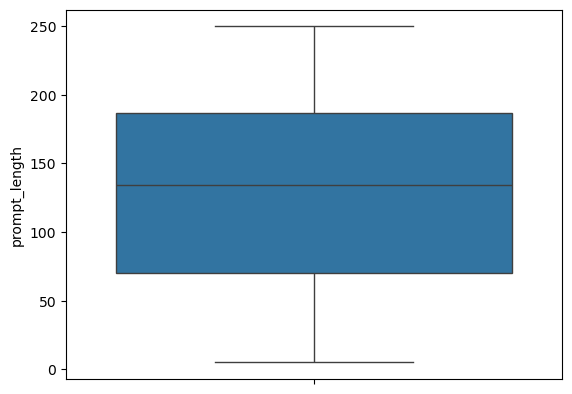

In [239]:
# Checking outlier using Boxplots
sns.boxplot(data=df['prompt_length'])
plt.show()

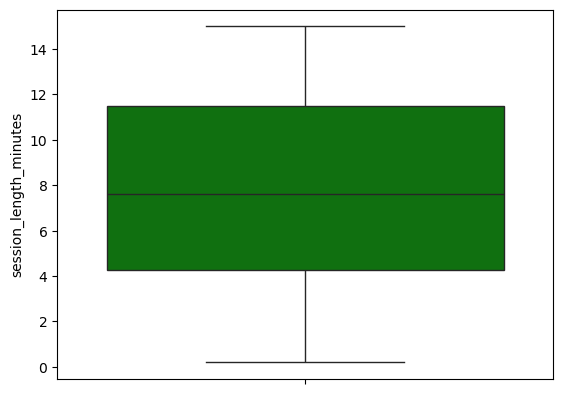

In [240]:
# Checking outlier using Boxplots
sns.boxplot(data=df['session_length_minutes'],color='g')
plt.show()

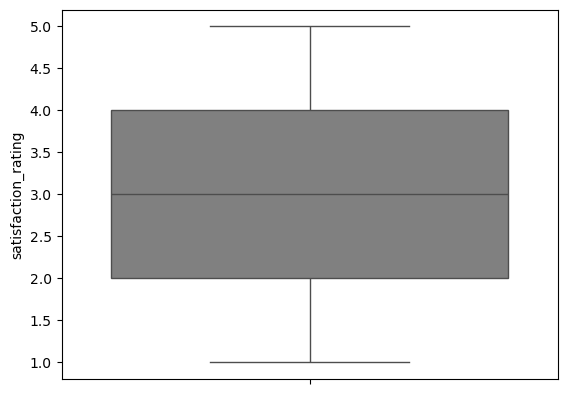

In [241]:
# Checking outlier using Boxplots
sns.boxplot(data=df['satisfaction_rating'],color='grey')
plt.show()

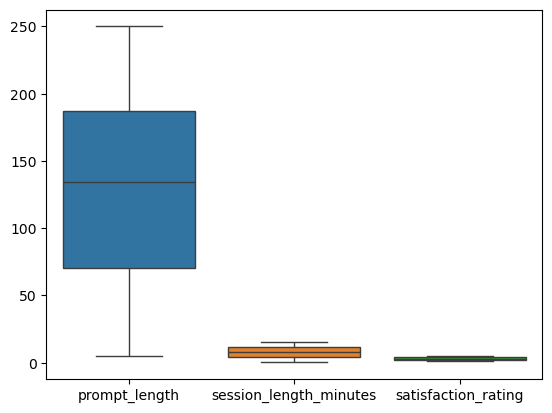

In [242]:
# Checking outlier using Boxplots
sns.boxplot(data=df)
plt.show()

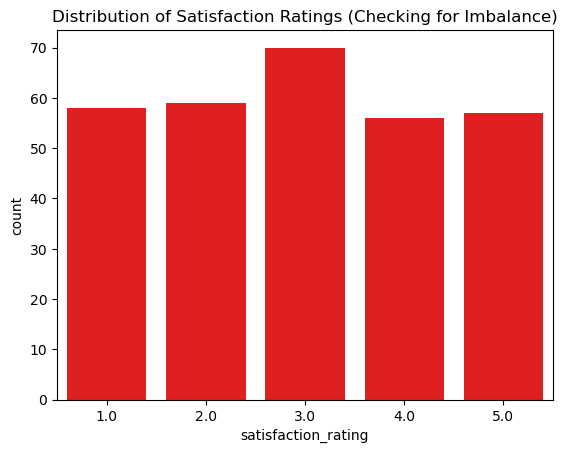

In [243]:
# Checking for imbalance

sns.countplot(x='satisfaction_rating', data=df,color='r')
plt.title('Distribution of Satisfaction Ratings (Checking for Imbalance)')
plt.show()

In [244]:
# Encoding device column

device = LabelEncoder()
df['device_encoded'] = device.fit_transform(df['device'])
df[['device', 'device_encoded']].head(10)

,device,device_encoded
0,Desktop,0
1,Mobile,1
2,Smart Speaker,2
3,Smart Speaker,2
4,Smart Speaker,2
5,Smart Speaker,2
6,Desktop,0
7,Mobile,1
8,Smart Speaker,2
9,Tablet,3


In [245]:
# Encoding usage_category column

usage = LabelEncoder()
df['usage_category_encoded'] = usage.fit_transform(df['usage_category'])
df[['usage_category', 'usage_category_encoded']].head(10)

,usage_category,usage_category_encoded
0,Education,2
1,Daily Tasks,1
2,Education,2
3,Productivity,4
4,Education,2
5,Coding,0
6,Entertainment,3
7,Research,5
8,Coding,0
9,Coding,0


In [246]:
# Encoding assistant_model column

model = LabelEncoder()
df['assistant_model_encoded'] = model.fit_transform(df['assistant_model'])
df[['assistant_model', 'assistant_model_encoded']].head(10)

,assistant_model,assistant_model_encoded
0,GPT-5.1,2
1,GPT-4o,0
2,GPT-4o,0
3,GPT-5,1
4,GPT-5.1,2
5,GPT-5.1,2
6,GPT-4o,0
7,o1,4
8,GPT-5,1
9,GPT-4o,0


In [20]:
# Extract timestamp features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['date'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour

df[['timestamp', 'year', 'month', 'date', 'hour']].head(10)

C:\Users\Sourav\AppData\Local\Temp\ipykernel_29132\651955464.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['timestamp'] = pd.to_datetime(df['timestamp'])


,timestamp,year,month,date,hour
0,2025-02-20 03:29:00,2025,2,20,3
1,2025-01-08 18:28:00,2025,1,8,18
2,2025-01-12 17:56:00,2025,1,12,17
3,2025-01-04 09:11:00,2025,1,4,9
4,2025-02-14 19:59:00,2025,2,14,19
5,2025-02-08 00:37:00,2025,2,8,0
6,2025-01-13 09:21:00,2025,1,13,9
7,2025-01-23 15:05:00,2025,1,23,15
8,2025-02-20 09:54:00,2025,2,20,9
9,2025-02-09 13:48:00,2025,2,9,13


In [248]:
df

,timestamp,device,usage_category,prompt_length,session_length_minutes,satisfaction_rating,assistant_model,device_encoded,usage_category_encoded,assistant_model_encoded,year,month,date,hour
0,2025-02-20 03:29:00,Desktop,Education,14.0,7.08,5.0,GPT-5.1,0,2,2,2025,2,20,3
1,2025-01-08 18:28:00,Mobile,Daily Tasks,32.0,13.07,2.0,GPT-4o,1,1,0,2025,1,8,18
2,2025-01-12 17:56:00,Smart Speaker,Education,236.0,10.15,4.0,GPT-4o,2,2,0,2025,1,12,17
3,2025-01-04 09:11:00,Smart Speaker,Productivity,134.0,14.45,3.0,GPT-5,2,4,1,2025,1,4,9
4,2025-02-14 19:59:00,Smart Speaker,Education,220.0,4.50,5.0,GPT-5.1,2,2,2,2025,2,14,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2025-02-13 14:38:00,Tablet,Education,16.0,5.02,5.0,GPT-4o,3,2,0,2025,2,13,14
296,2025-01-29 19:07:00,Smart Speaker,Productivity,28.0,13.49,3.0,GPT-4o,2,4,0,2025,1,29,19
297,2025-03-05 20:43:00,Tablet,Productivity,112.0,3.91,4.0,Mini,3,4,3,2025,3,5,20
298,2025-02-27 21:23:00,Smart Speaker,Daily Tasks,105.0,1.61,4.0,o1,2,1,4,2025,2,27,21


In [249]:
df.isnull().sum()

timestamp                  0
device                     0
usage_category             0
prompt_length              0
session_length_minutes     0
satisfaction_rating        0
assistant_model            0
device_encoded             0
usage_category_encoded     0
assistant_model_encoded    0
year                       0
month                      0
date                       0
hour                       0
dtype: int64

In [250]:
# Correlation with target variable
numerical_features = ['prompt_length', 'session_length_minutes', 'device_encoded', 
                      'usage_category_encoded', 'assistant_model_encoded',
                      'month', 'date', 'hour','satisfaction_rating']

df[numerical_features].corr()

,prompt_length,session_length_minutes,device_encoded,usage_category_encoded,assistant_model_encoded,month,date,hour,satisfaction_rating
prompt_length,1.000000,-0.102863,-0.044959,0.068748,0.038049,0.110550,-0.097542,-0.063297,0.077894
session_length_minutes,-0.102863,1.000000,0.066498,-0.067492,-0.074659,0.047498,-0.060496,0.049215,-0.009990
device_encoded,-0.044959,0.066498,1.000000,-0.044753,-0.032594,0.094006,-0.073698,0.012431,0.033350
usage_category_encoded,0.068748,-0.067492,-0.044753,1.000000,0.060902,0.021109,-0.065286,-0.013853,-0.074739
assistant_model_encoded,0.038049,-0.074659,-0.032594,0.060902,1.000000,-0.003740,0.005619,-0.019435,-0.017766
month,0.110550,0.047498,0.094006,0.021109,-0.003740,1.000000,-0.437467,-0.029117,0.097011
date,-0.097542,-0.060496,-0.073698,-0.065286,0.005619,-0.437467,1.000000,-0.018062,-0.132057
hour,-0.063297,0.049215,0.012431,-0.013853,-0.019435,-0.029117,-0.018062,1.000000,0.004178
satisfaction_rating,0.077894,-0.009990,0.033350,-0.074739,-0.017766,0.097011,-0.132057,0.004178,1.000000


In [251]:
# Correlation with target variable
numerical_features = ['prompt_length', 'session_length_minutes', 'device_encoded', 
                      'usage_category_encoded', 'assistant_model_encoded', 'year',
                      'month', 'date', 'hour', 'satisfaction_rating']

df[numerical_features].corr()

,prompt_length,session_length_minutes,device_encoded,usage_category_encoded,assistant_model_encoded,year,month,date,hour,satisfaction_rating
prompt_length,1.000000,-0.102863,-0.044959,0.068748,0.038049,NaN,0.110550,-0.097542,-0.063297,0.077894
session_length_minutes,-0.102863,1.000000,0.066498,-0.067492,-0.074659,NaN,0.047498,-0.060496,0.049215,-0.009990
device_encoded,-0.044959,0.066498,1.000000,-0.044753,-0.032594,NaN,0.094006,-0.073698,0.012431,0.033350
usage_category_encoded,0.068748,-0.067492,-0.044753,1.000000,0.060902,NaN,0.021109,-0.065286,-0.013853,-0.074739
assistant_model_encoded,0.038049,-0.074659,-0.032594,0.060902,1.000000,NaN,-0.003740,0.005619,-0.019435,-0.017766
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.110550,0.047498,0.094006,0.021109,-0.003740,NaN,1.000000,-0.437467,-0.029117,0.097011
date,-0.097542,-0.060496,-0.073698,-0.065286,0.005619,NaN,-0.437467,1.000000,-0.018062,-0.132057
hour,-0.063297,0.049215,0.012431,-0.013853,-0.019435,NaN,-0.029117,-0.018062,1.000000,0.004178
satisfaction_rating,0.077894,-0.009990,0.033350,-0.074739,-0.017766,NaN,0.097011,-0.132057,0.004178,1.000000


In [252]:
df.drop(columns=['year']).corr(numeric_only=True)

,prompt_length,session_length_minutes,satisfaction_rating,device_encoded,usage_category_encoded,assistant_model_encoded,month,date,hour
prompt_length,1.000000,-0.102863,0.077894,-0.044959,0.068748,0.038049,0.110550,-0.097542,-0.063297
session_length_minutes,-0.102863,1.000000,-0.009990,0.066498,-0.067492,-0.074659,0.047498,-0.060496,0.049215
satisfaction_rating,0.077894,-0.009990,1.000000,0.033350,-0.074739,-0.017766,0.097011,-0.132057,0.004178
device_encoded,-0.044959,0.066498,0.033350,1.000000,-0.044753,-0.032594,0.094006,-0.073698,0.012431
usage_category_encoded,0.068748,-0.067492,-0.074739,-0.044753,1.000000,0.060902,0.021109,-0.065286,-0.013853
assistant_model_encoded,0.038049,-0.074659,-0.017766,-0.032594,0.060902,1.000000,-0.003740,0.005619,-0.019435
month,0.110550,0.047498,0.097011,0.094006,0.021109,-0.003740,1.000000,-0.437467,-0.029117
date,-0.097542,-0.060496,-0.132057,-0.073698,-0.065286,0.005619,-0.437467,1.000000,-0.018062
hour,-0.063297,0.049215,0.004178,0.012431,-0.013853,-0.019435,-0.029117,-0.018062,1.000000


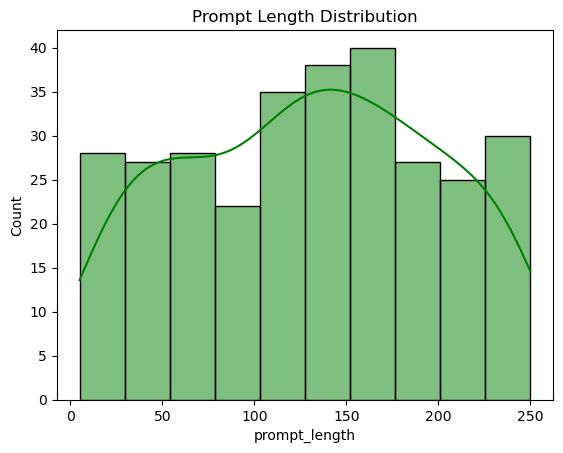

In [253]:
# Histplot for prompt length

sns.histplot(df['prompt_length'],color='g', kde=True)
plt.title('Prompt Length Distribution')
plt.show()

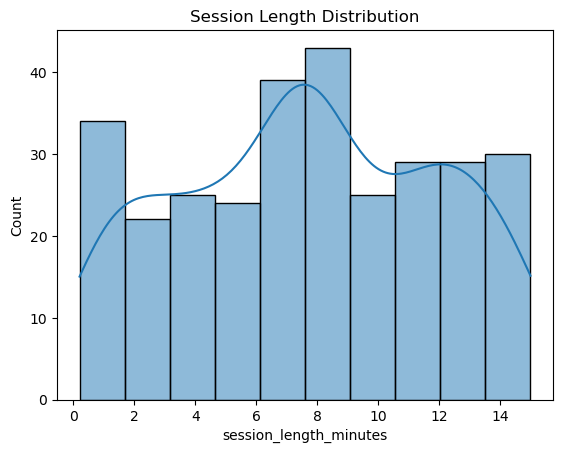

In [254]:
# Histplot for session length

sns.histplot(df['session_length_minutes'], kde=True)
plt.title('Session Length Distribution')
plt.show()

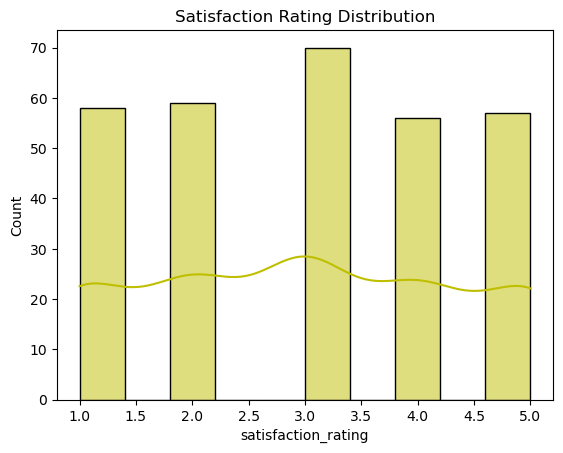

In [255]:
# Histplot for satisfaction rating

sns.histplot(df['satisfaction_rating'],color='y', kde=True)
plt.title('Satisfaction Rating Distribution')
plt.show()

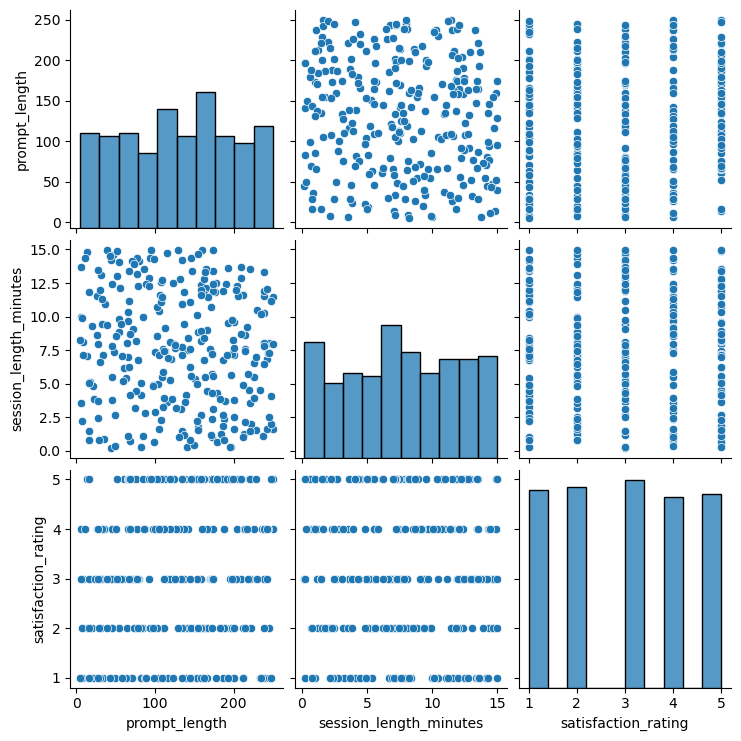

In [3]:
sns.pairplot(df[['prompt_length', 'session_length_minutes', 'satisfaction_rating']])
plt.show()

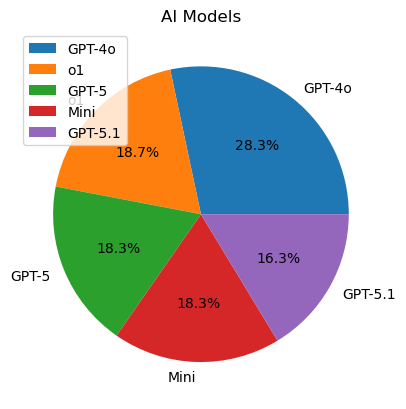

In [257]:
# AI Models PIE chart

plt.pie(df['assistant_model'].value_counts(), labels=df['assistant_model'].value_counts().index, autopct='%1.1f%%')
plt.title('AI Models')
plt.legend()
plt.show()

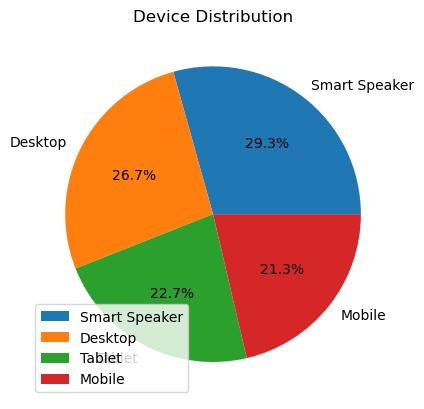

In [258]:
# Device 

plt.pie(df['device'].value_counts(), labels=df['device'].value_counts().index, autopct='%1.1f%%')
plt.title('Device Distribution')
plt.legend()
plt.show()

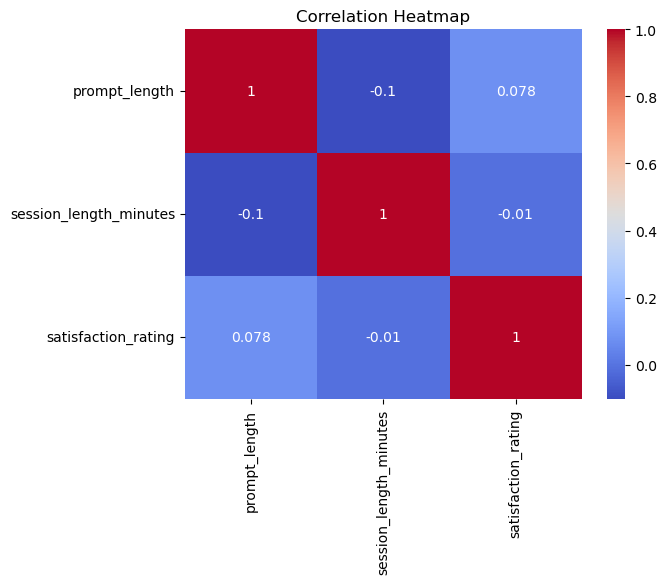

In [259]:
# Simple heatmap - Correlation matrix
corr = df[['prompt_length', 'session_length_minutes', 'satisfaction_rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

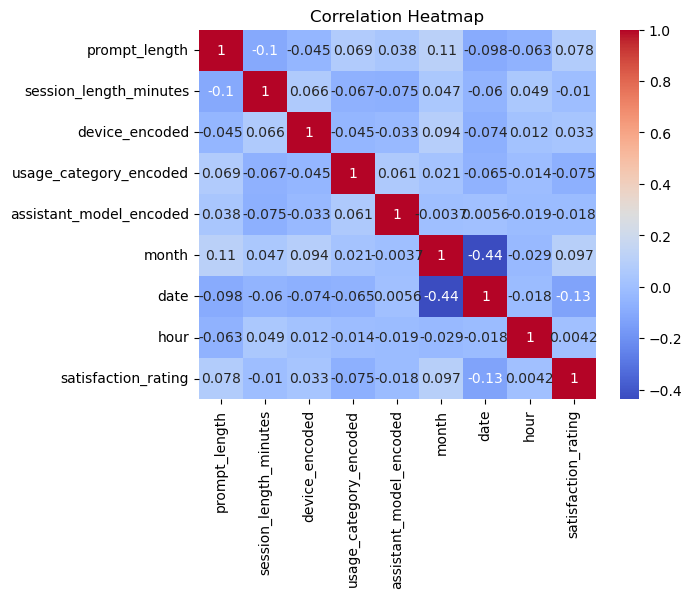

In [260]:
# Correlation with target variable
numerical_features = ['prompt_length', 'session_length_minutes', 'device_encoded', 
                      'usage_category_encoded', 'assistant_model_encoded',
                      'month', 'date', 'hour', 'satisfaction_rating']

crr=df[numerical_features].corr()

sns.heatmap(crr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()